google/vivit-b-16x2 <br>
https://huggingface.co/google/vivit-b-16x2 <br>
https://huggingface.co/docs/transformers/main/model_doc/vivit

# Import Library

In [1]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [2]:
import torch
torch.autograd.set_detect_anomaly(True)

print('pytorch version', torch.__version__)
print("GPU available:", torch.cuda.device_count())
#print('GPU name:',torch.cuda.get_device_name(0))

# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pytorch version 2.5.1+cu121
GPU available: 0


In [3]:
#!nvcc --version

In [4]:
# For data augmentation
from torchvision import transforms
from torchvision.io import write_video

In [5]:
!pip install -q PyAV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 4.9 MB/s eta 0:00:00


In [6]:
#!pip install -q transformers==4.35.0

In [7]:
import transformers

# For Tokenizers
from transformers import VivitImageProcessor, VivitConfig

# For Model
from transformers import VivitModel, VivitForVideoClassification

# For TPU
from transformers import set_seed
from torch.optim import AdamW

In [8]:
!pip install -q datasets #==2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [9]:
# For Data Loaders
import datasets
from torch.utils.data import Dataset, DataLoader
#from torchvision.transforms import Compose, Resize, ToTensor

In [10]:
#!pip install -q accelerate==0.21.0

In [11]:
# For Display
from tqdm.notebook import tqdm

# For GPU
from accelerate import Accelerator, notebook_launcher

In [12]:
!pip install -q decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 51.8 MB/s eta 0:00:00


In [13]:
# Use PyTorch bridge for Decord
import decord

from decord.bridge import set_bridge
decord.bridge.set_bridge("torch")

from decord import VideoReader

In [14]:
!pip install -q av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.5 MB/s eta 0:00:00


In [15]:
import av

In [16]:
!pip install -q tensorboard

In [17]:
from torch.utils.tensorboard import SummaryWriter

In [18]:
#import kagglehub
import random

import cv2
from google.colab.patches import cv2_imshow

import os
import PIL
import gc
from glob import glob
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [20]:
# installing MediaPipe
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 47.7 MB/s eta 0:00:00


In [21]:
#pose_landmark_model = !wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task
#hand_landmark_model = !wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [22]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2

In [23]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
mp_face = mp.solutions.face_mesh
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [24]:
!pip install -q moviepy

In [25]:
from moviepy.editor import ImageSequenceClip

  if event.key is 'enter':



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from google.colab import userdata
secret_token_hf = userdata.get('HF_TOKEN')

In [28]:
gdrive_path = '/content/drive/MyDrive/Kaggle/SignLanguage'
local_path = '/content/SignLanguage'

In [29]:
hand_model_path = '/content/drive/MyDrive/Kaggle/SignLanguage/hand_landmarker.task'
pose_model_path = '/content/drive/MyDrive/Kaggle/SignLanguage/pose_landmarker.task'

In [30]:
BATCH_SIZE = 8
print('BATCH_SIZE =',BATCH_SIZE)

BUFFER_SIZE = BATCH_SIZE * 8
print('BUFFER_SIZE =',BUFFER_SIZE)

MODEL_TRANSFORMER = 'google/vivit-b-16x2'

FRAME_STEPS = 4
print('FRAME_STEPS =',FRAME_STEPS)

CLIP_LENGTH = 32 # MTech project was with CLIP_LENGTH = 85, CLIP_LENGTH of model = 32
print('CLIP_LENGTH =',CLIP_LENGTH)

CLIP_HEIGHT = 640
CLIP_WIDTH = 480
print('Image Dimension =', CLIP_WIDTH,'X', CLIP_HEIGHT)

CLIP_SIZE = 224
print('Image Dimension =', CLIP_SIZE,'X', CLIP_SIZE)

BATCH_SIZE = 8
BUFFER_SIZE = 64
FRAME_STEPS = 4
CLIP_LENGTH = 32
Image Dimension = 480 X 640
Image Dimension = 224 X 224


In [31]:
#import os
#os.environ["CUDA_MODULE_LOADING"] = "LAZY"

In [32]:
def seed_everything(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [33]:
seed_everything(42)

# Import Data

In [35]:
data_dir = f'{gdrive_path}/Data'
print(data_dir)

/content/drive/MyDrive/Kaggle/SignLanguage/Data


In [36]:
# Copy videos from Google Drive to local disk for faster loading during training
if not os.path.exists(local_path):
    shutil.copytree(data_dir, local_path)

print("Videos copied to local disk.")

Videos copied to local disk.


In [39]:
print(local_path)

/content/SignLanguage


In [40]:
classes = sorted(os.listdir(local_path))
print(classes)

['bad', 'beautiful', 'big', 'blind', 'cheap', 'cold', 'cool', 'curved', 'deaf', 'dry', 'expensive', 'famous', 'fast', 'female', 'flat', 'good', 'happy', 'healthy', 'hot', 'light', 'long', 'loose', 'loud', 'narrow', 'new', 'old', 'quiet', 'sad', 'short', 'sick', 'slow', 'small', 'tall', 'ugly']


In [41]:
label_to_idx = {}
idx_to_label = {}

for idx, label in enumerate(classes):
  #class_folder = os.path.join(local_path, label)
  if os.path.exists(local_path):
    label_to_idx[label] = idx
    idx_to_label[idx] = label

In [42]:
print(label_to_idx)

{'bad': 0, 'beautiful': 1, 'big': 2, 'blind': 3, 'cheap': 4, 'cold': 5, 'cool': 6, 'curved': 7, 'deaf': 8, 'dry': 9, 'expensive': 10, 'famous': 11, 'fast': 12, 'female': 13, 'flat': 14, 'good': 15, 'happy': 16, 'healthy': 17, 'hot': 18, 'light': 19, 'long': 20, 'loose': 21, 'loud': 22, 'narrow': 23, 'new': 24, 'old': 25, 'quiet': 26, 'sad': 27, 'short': 28, 'sick': 29, 'slow': 30, 'small': 31, 'tall': 32, 'ugly': 33}


In [43]:
print(idx_to_label)

{0: 'bad', 1: 'beautiful', 2: 'big', 3: 'blind', 4: 'cheap', 5: 'cold', 6: 'cool', 7: 'curved', 8: 'deaf', 9: 'dry', 10: 'expensive', 11: 'famous', 12: 'fast', 13: 'female', 14: 'flat', 15: 'good', 16: 'happy', 17: 'healthy', 18: 'hot', 19: 'light', 20: 'long', 21: 'loose', 22: 'loud', 23: 'narrow', 24: 'new', 25: 'old', 26: 'quiet', 27: 'sad', 28: 'short', 29: 'sick', 30: 'slow', 31: 'small', 32: 'tall', 33: 'ugly'}


In [44]:
# Collect all video files
video_path = []
labels_int = []
labels_text = []
for idx, label in enumerate(classes):
  class_folder = os.path.join(local_path, label)
  #print(class_folder)
  video_file = glob(os.path.join(class_folder, '*.MOV'))
  #print(video_file)
  video_path.extend(video_file)
  labels_int.extend([idx] * len(video_file))
  labels_text.extend([label] * len(video_file))

In [45]:
print('input path size:', len(video_path))
print(video_path)

input path size: 547
['/content/SignLanguage/bad/MVI_9273.MOV', '/content/SignLanguage/bad/MVI_5241.MOV', '/content/SignLanguage/bad/MVI_5319.MOV', '/content/SignLanguage/bad/MVI_5163.MOV', '/content/SignLanguage/bad/MVI_9353.MOV', '/content/SignLanguage/bad/MVI_9433.MOV', '/content/SignLanguage/bad/MVI_9352.MOV', '/content/SignLanguage/bad/MVI_5161.MOV', '/content/SignLanguage/bad/MVI_9435.MOV', '/content/SignLanguage/bad/MVI_5320.MOV', '/content/SignLanguage/bad/MVI_9516.MOV', '/content/SignLanguage/bad/MVI_5243.MOV', '/content/SignLanguage/bad/MVI_9271.MOV', '/content/SignLanguage/bad/MVI_9272.MOV', '/content/SignLanguage/bad/MVI_5242.MOV', '/content/SignLanguage/bad/MVI_5321.MOV', '/content/SignLanguage/bad/MVI_9513.MOV', '/content/SignLanguage/bad/MVI_5162.MOV', '/content/SignLanguage/bad/MVI_9514.MOV', '/content/SignLanguage/bad/MVI_9434.MOV', '/content/SignLanguage/bad/MVI_9354.MOV', '/content/SignLanguage/beautiful/MVI_9569.MOV', '/content/SignLanguage/beautiful/MVI_9725.MOV', 

In [46]:
print('labels size:', len(labels_int))
print(labels_int)

labels size: 547
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,

In [47]:
print('labels size:', len(labels_text))
print(labels_text)

labels size: 547
['bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'blind', 'blind', 'blind', 'blind', 'blind', 'blind', 'blind', 'blind', 'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cold', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'cool', 'curved', 'curved', 'curved', 'curved', 'curved', 'curved', 'curved', 'curved', 'deaf', 'deaf', 'de

# Train Test Split

In [48]:
train_path, val_path, train_label, val_label = train_test_split(video_path, labels_int, test_size=0.2, stratify=labels_text, random_state=42)
#train_path, test_path, train_label, test_label = train_test_split(train_path, train_label, test_size=0.2, stratify=train_label, random_state=42)

In [49]:
print('Train data size:',len(train_path))
print('Val data size:',len(val_path))
#print('Test data size:',len(test_path))

Train data size: 437
Val data size: 110


In [50]:
train_label[:5]

[15, 7, 12, 7, 2]

# Create MP Objects

In [51]:
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
#FaceLandmarker = mp.tasks.vision.FaceLandmarker
#FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a hand landmarker instance with the video mode:
options_hand = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path = hand_model_path),
    running_mode=VisionRunningMode.VIDEO)

# Create a pose landmarker instance with the video mode:
options_pose = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=pose_model_path),
    running_mode=VisionRunningMode.VIDEO)

## Create a face landmarker instance with the video mode:
#options_face = FaceLandmarkerOptions(
#    base_options=BaseOptions(model_asset_path=face_model_path),
#    running_mode=VisionRunningMode.VIDEO)

#detector_face = vision.FaceLandmarker.create_from_options(options_face)
detector_hand = vision.HandLandmarker.create_from_options(options_hand)
detector_pose = vision.PoseLandmarker.create_from_options(options_pose)

In [52]:
holistic = mp_holistic.Holistic(
    static_image_mode=False,
    model_complexity=1,
    smooth_landmarks=True,
    enable_segmentation=False,
    refine_face_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
    )

# Validating the input data - NOT USED

In [ ]:
#idx = 2
#train_path[idx]

'/content/SignLanguage/warm/MVI_5223.MOV'

In [ ]:
#vr_demo = VideoReader(train_path[idx])#, width=CLIP_WIDTH, height=CLIP_HEIGHT)

In [ ]:
#print('Number of Fames in the video:',len(vr_demo))

Number of Fames in the video: 62


In [ ]:
#frame = vr_demo[1]
#print('Shape of the frame:',frame.shape)

Shape of the frame: torch.Size([1080, 1920, 3])


In [ ]:
#key_indices = vr_demo.get_key_indices()
#key_frames = vr_demo.get_batch(key_indices)
#print(key_frames.shape)

torch.Size([6, 1080, 1920, 3])


In [ ]:
#print(key_frames.permute(0, 3, 1, 2).shape)

torch.Size([6, 3, 1080, 1920])


In [ ]:
#image_processor_demo = VivitImageProcessor.from_pretrained(MODEL_TRANSFORMER,
#                                                           size={'width':CLIP_WIDTH, 'height':CLIP_HEIGHT},
#                                                           crop_size={'width':CLIP_WIDTH, 'height':CLIP_HEIGHT}
#                                                           )

preprocessor_config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

In [ ]:
#model_inputs_demo = image_processor_demo.preprocess(videos=list(key_frames),
#                                               return_tensors='pt',
#                                               input_data_format='channels_last', # image in (height, width, num_channels) format.
#                                               )

In [ ]:
#print(model_inputs_demo.pixel_values.shape)

torch.Size([1, 6, 3, 640, 480])


In [ ]:
#reshaped_video = model_inputs_demo.pixel_values[0].permute(0, 2, 3, 1)

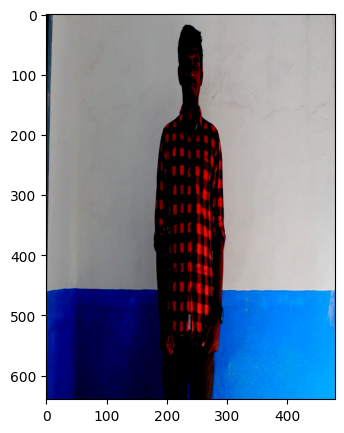

In [ ]:
#plt.imshow(reshaped_video[0])

In [ ]:
#sample_input = model_inputs_demo.pixel_values[0]
#
## Define original dimensions
#height =  sample_input.shape[2]
#width = sample_input.shape[3]
#
## Define the crop factor
#target_height = height - (height // 10) # Crop 10% of the height
#target_width =  width - (width // 2) # Crop 50% of width
#
## Define (Offset) the amount of crop required at each side of the image
#offset_height = (height - target_height) // 2
#offset_width = (width - target_width) // 2

In [ ]:
#sample_out = transforms.v2.functional.crop(sample_input, offset_height, offset_width, target_height, target_width)

In [ ]:
#print(sample_input.shape)
#print(sample_out.shape)

torch.Size([6, 3, 640, 480])
torch.Size([6, 3, 576, 240])


In [ ]:
#reshaped_video = sample_out.permute(0, 2, 3, 1)

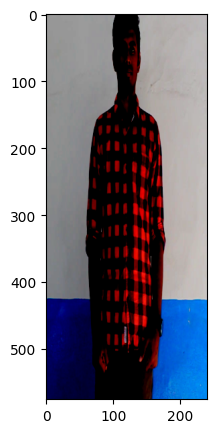

In [ ]:
#plt.imshow(reshaped_video[0])

In [ ]:
## Define a sample transformation pipeline
#transform_demo = transforms.Compose([
#    #transforms.RandomHorizontalFlip(),
#    #transforms.RandomVerticalFlip(),
#    #transforms.RandomResizedCrop(size=(640, 480), scale=(0.5, 1)),  # Zoom and crop # (1080, 1920)
#    transforms.v2.Resize((224, 224)),
#    transforms.v2.RandomPerspective(),
#    #transforms.v2.ColorJitter(brightness=(0.2, 0.8), contrast=(0.2, 0.8), saturation=(0.2, 0.8), hue=(-0.2, 0.2)),
#    transforms.v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
#    #transforms.v2.ColorJitter(),
#    #transforms.v2.RandomRotation(15),
#    #transforms.v2.ToImage(),
#    transforms.v2.ToDtype(torch.float32, scale=True)
#])

In [ ]:
#selected_video = sample_out
#print(len(selected_video))
#print(selected_video.shape)

6
torch.Size([6, 3, 576, 240])


In [ ]:
#augmented_video = transform_demo(selected_video)

In [ ]:
#print(augmented_video.shape)

torch.Size([6, 3, 224, 224])


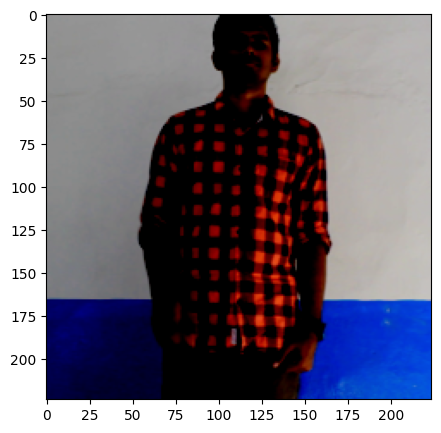

In [ ]:
#plt.imshow(augmented_video[4].permute(1, 2, 0))

In [ ]:
#print(augmented_video.max())
#print(augmented_video.min())

tensor(0.9091)
tensor(0.)


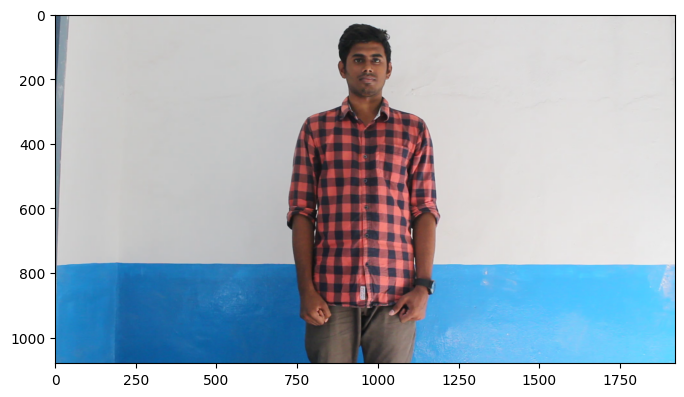

In [ ]:
#plt.imshow(key_frames[0])

# Load Image - NOT USED

In [ ]:
'''
# Load the input Video
#cap = cv2.VideoCapture('/content/drive/MyDrive/Mtech_Project/Dataset_Video/MVI_9855.MOV')
cap = cv2.VideoCapture(train_path[idx])

fps = cap.get(cv2.CAP_PROP_FPS)
print('frames per second =',fps)

## Conversion

while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      break

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # results = hands.process(image)
    # results = detector_vid.detect(image)
    results = holistic.process(image)

    # Draw the  annotations on the image.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #if results.segmentation_mask:
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
        connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
        )
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
        connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
        )
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec = mp_drawing_styles.get_default_pose_landmarks_style(),
        #connection_drawing_spec = None
        )
    #mp_drawing.draw_landmarks(
    #    image,
    #    results.face_landmarks,
    #    mp_holistic.FACEMESH_CONTOURS,
    #    landmark_drawing_spec = None,
    #    connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_contours_style()
    #    )

    # Flip the image horizontally for a selfie-view display.
    cv2_imshow(cv2.flip(image, 1))

    #if cv2.waitKey(5) & 0xFF == ord('r'):
    #  break

cap.release()
cv2.destroyAllWindows()
'''

'\n# Load the input Video\n#cap = cv2.VideoCapture(\'/content/drive/MyDrive/Mtech_Project/Dataset_Video/MVI_9855.MOV\')\ncap = cv2.VideoCapture(train_path[idx])\n\nfps = cap.get(cv2.CAP_PROP_FPS)\nprint(\'frames per second =\',fps)\n\n## Conversion\n\nwhile cap.isOpened():\n    success, image = cap.read()\n    if not success:\n      print("Ignoring empty camera frame.")\n      # If loading a video, use \'break\' instead of \'continue\'.\n      break\n\n    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\n    # results = hands.process(image)\n    # results = detector_vid.detect(image)\n    results = holistic.process(image)\n\n    # Draw the  annotations on the image.\n    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)\n    #if results.segmentation_mask:\n    mp_drawing.draw_landmarks(\n        image,\n        results.left_hand_landmarks,\n        mp_hands.HAND_CONNECTIONS,\n        landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),\n        connection_drawing_s

# Create Dataset

In [48]:
class CustomDataset(Dataset):
    def __init__(self, pixel_values, labels):
        self.labels = labels.to(device)
        self.pixel_values = pixel_values.to(device)

    def __len__(self):
        return len(self.pixel_values)

    def __getitem__(self, idx):
        item = {
            'labels': self.labels[idx],
            'pixel_values': self.pixel_values[idx],
        }
        return item

In [49]:
class CreateDataset():
    def __init__(self
                , clip_len
                , clip_size
                , frame_step
                ):
        super().__init__()
        self.clip_len = clip_len
        self.clip_size = clip_size
        self.frame_step = frame_step

        # Define a transformation pipeline
        self.transform_train = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    #transforms.v2.Resize((self.clip_size, self.clip_size)),
                                    transforms.v2.RandomPerspective(),
                                    transforms.v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

        # Define a sample transformation pipeline
        self.transform_val = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.Resize((self.clip_size, self.clip_size)),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

    def read_video(self, video_path):
        # Read the video and convert to frames
        vr = VideoReader(video_path)
        total_frames = len(vr)

        # Determine frame indices based on total frames
        if total_frames < self.clip_len:
            key_indices = list(range(total_frames))
            for _ in range(self.clip_len - len(key_indices)):
                key_indices.append(key_indices[-1])
        else:
            key_indices = list(range(0, total_frames, max(1, total_frames // self.clip_len)))[:self.clip_len]

        #load frames
        frames = vr.get_batch(key_indices)
        del vr
        # Force garbage collection
        gc.collect()

        return frames

    def add_landmarks(self, video):
        annotated_image = []
        for frame in video:

            #Convert pytorch Tensor to CV2 image
            image = frame.numpy()
            #image = frame.permute(1, 2, 0).numpy() # Convert to (H, W, C) format for mediapipe to work
            #print(image.shape)
            #image = (image_np * 255).astype(np.uint8)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            results = holistic.process(image)

            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_pose_landmarks_style(),
                #connection_drawing_spec = None
                )

            #image = (image / 255).astype(np.float32)
            #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            annotated_image.append(torch.from_numpy(image).to(device))

            del image, results
            # Force garbage collection
            gc.collect()

        #annotated_image = torch.stack(annotated_image)
        #annotated_image = torch.from_numpy(np.array(annotated_image))
        return torch.stack(annotated_image)

    def create_dataset(self, video_paths, labels, training=True):
        pixel_values = []

        # Define Height and Width
        height = self.clip_size*4
        width = self.clip_size*8

        # Define the crop factor
        target_height = height - (height // 10) # Crop 10% of the height
        target_width =  width - (width // 2) # Crop 50% of width

        # Define (Offset) the amount of crop required at each side of the image
        offset_height = (height - target_height) // 2
        offset_width = (width - target_width) // 2


        for path in tqdm(video_paths):
            #print('Video', path)
            # Read and process Videos
            video = self.read_video(path)
            #print('Stage 1',video.shape)
            video = self.add_landmarks(video)
            #print('Stage 3',video.shape)

            if training:
                # Data Preperation for ML model with Augmentation
                video = transforms.v2.functional.resized_crop(video.permute(0, 3, 1, 2),
                                                              top=offset_height, left=offset_width,
                                                              height=target_height, width=target_width,
                                                              size=(self.clip_size, self.clip_size))
                video = self.transform_train(video)
            else:
                # Data Preperation for ML Model without Augmentation
                video = self.transform_val(video.permute(0, 3, 1, 2))

            #print('Stage 4',video.shape)
            pixel_values.append(video.to(device))
            del video
            # Force garbage collection
            gc.collect()

        pixel_values = torch.stack(pixel_values).to(device)
        labels = torch.tensor(labels, dtype=torch.int64).to(device)

        return CustomDataset(pixel_values=pixel_values,
                             labels=labels)

In [50]:
dataset_obj = CreateDataset(CLIP_LENGTH, CLIP_SIZE, FRAME_STEPS) #, CLIP_WIDTH, CLIP_HEIGHT)

# Testing the custome image processing class

## Stage 1 = read_video

In [51]:
sample_frames = dataset_obj.read_video(train_path[0])

In [52]:
print(sample_frames.shape)

torch.Size([32, 1080, 1920, 3])


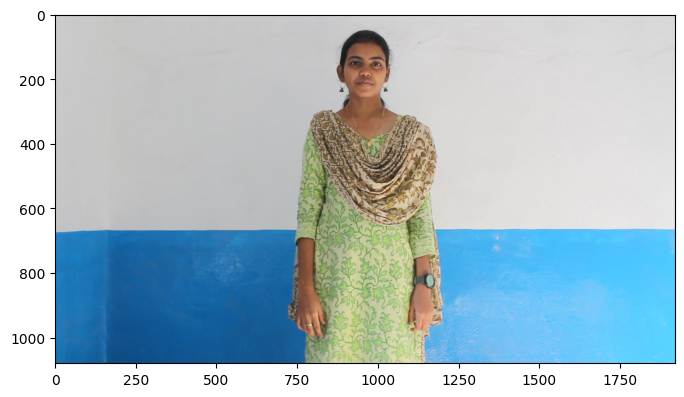

In [53]:
plt.imshow(sample_frames[0])

## Stage 2 = add_landmarks

In [54]:
sample_landmarked_frames = dataset_obj.add_landmarks(sample_frames)

In [55]:
print(sample_landmarked_frames.shape)

torch.Size([32, 1080, 1920, 3])


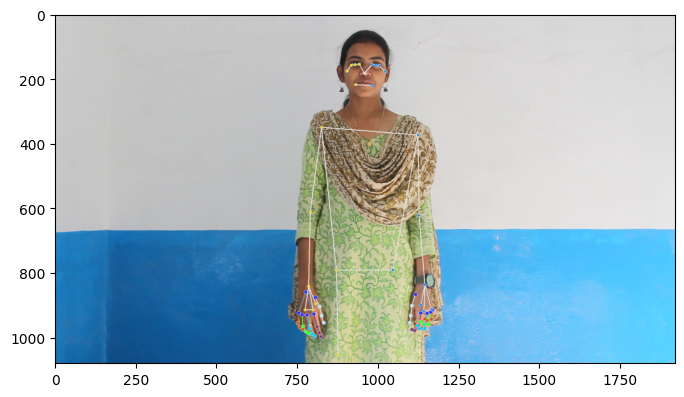

In [56]:
plt.imshow(sample_landmarked_frames[0])

In [57]:
#sample_landmarked_frames_sc = (sample_landmarked_frames / 255)
#plt.imshow(sample_landmarked_frames_sc[10])

## Stage 3 = Data Augmentation - Training DS

In [58]:
# Define Height and Width
height = CLIP_SIZE*4
width = CLIP_SIZE*8

# Define the crop factor
target_height = height - (height // 10) # Crop 10% of the height
target_width =  width - (width // 2) # Crop 50% of width

# Define (Offset) the amount of crop required at each side of the image
offset_height = (height - target_height) // 2
offset_width = (width - target_width) // 2

In [59]:
sample_cropped_frames = transforms.v2.functional.resized_crop(sample_landmarked_frames.permute(0, 3, 1, 2),
                                              top=offset_height, left=offset_width,
                                              height=target_height, width=target_width,
                                              size=(CLIP_SIZE, CLIP_SIZE))

In [60]:
transform_train_sample_obj = transforms.v2.Compose([
                            transforms.v2.ToImage(),
                            #transforms.v2.Resize((CLIP_SIZE, CLIP_SIZE)),
                            transforms.v2.RandomPerspective(),
                            transforms.v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
                            transforms.v2.ToDtype(torch.uint8, scale=False)
                        ])

In [61]:
sample_augmented_frames_train = transform_train_sample_obj(sample_cropped_frames)

In [62]:
sample_augmented_frames_train.shape

torch.Size([32, 3, 224, 224])

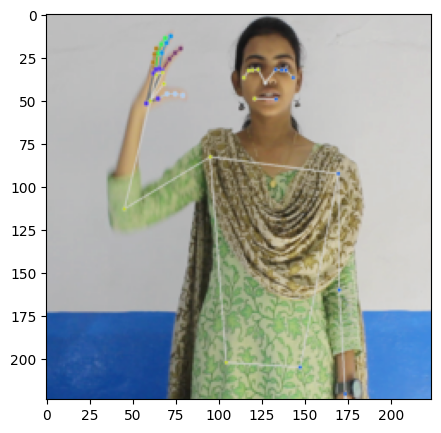

In [63]:
plt.imshow(sample_augmented_frames_train[7].permute(1, 2, 0))

In [64]:
print(sample_augmented_frames_train.max())
print(sample_augmented_frames_train.min())

tensor(241, dtype=torch.uint8)
tensor(3, dtype=torch.uint8)


## Stage 4 = Data Augmentation - Validation Dataset

In [65]:
transform_val_sample_obj = transforms.v2.Compose([
                            transforms.v2.ToImage(),
                            transforms.v2.Resize((CLIP_SIZE, CLIP_SIZE)),
                            transforms.v2.ToDtype(torch.uint8, scale=False)
                        ])

In [66]:
sample_resized_frames = transform_val_sample_obj(sample_landmarked_frames.permute(0, 3, 1, 2))

In [67]:
sample_resized_frames.shape

torch.Size([32, 3, 224, 224])

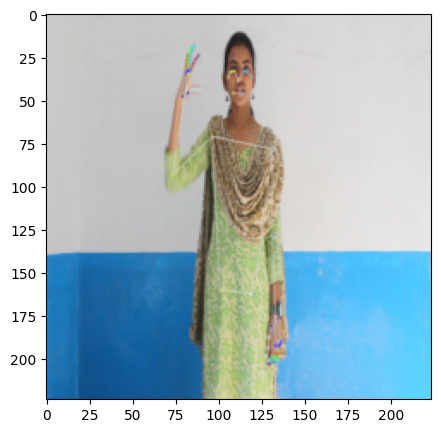

In [68]:
plt.imshow(sample_resized_frames[7].permute(1, 2, 0))

In [69]:
print(sample_resized_frames.max())
print(sample_resized_frames.min())

tensor(255, dtype=torch.uint8)
tensor(9, dtype=torch.uint8)


# Convert to video and save

In [73]:
sample_reshaped_frames = sample_resized_frames.permute(0, 2, 3, 1)
sample_reshaped_frames.shape

torch.Size([32, 224, 224, 3])

In [86]:
# Create a video clip from the frames
clip = ImageSequenceClip(list(sample_reshaped_frames.numpy()), fps=10)

# Output video file path
output_path = f'{gdrive_path}/ProcessedData/video_moviepy.mp4'

# Write the video to the file
clip.write_videofile(output_path, codec='libx264')

t:   3%|▎         | 1/33 [00:21<11:32, 21.63s/it, now=None]

Moviepy - Building video /content/drive/MyDrive/Kaggle/SignLanguage/ProcessedData/video_moviepy.mp4.
Moviepy - Writing video /content/drive/MyDrive/Kaggle/SignLanguage/ProcessedData/video_moviepy.mp4




t:   3%|▎         | 1/33 [00:22<11:56, 22.39s/it, now=None]

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/Kaggle/SignLanguage/ProcessedData/video_moviepy.mp4


In [81]:
#write_video(f'{gdrive_path}/ProcessedData/video.mp4',video_array=sample_resized_frames.permute(0, 2, 3, 1),fps=10, video_codec='h264')
#write_video(f'{gdrive_path}/ProcessedData/video.mp4', video_array=sample_reshaped_frames, options = {"crf": "17"}, fps=10)

# Create Dataset - Preprocessing all videos

In [53]:
class CreateProcessedDataset():
    def __init__(self
                , clip_len
                , clip_size
                , frame_step
                ):
        super().__init__()
        self.clip_len = clip_len
        self.clip_size = clip_size
        self.frame_step = frame_step

        # Define a sample transformation pipeline
        self.transform_val = transforms.v2.Compose([
                                    transforms.v2.ToImage(),
                                    transforms.v2.Resize((self.clip_size, self.clip_size)),
                                    transforms.v2.ToDtype(torch.uint8, scale=False)
                                ])

    def read_video(self, video_path):
        # Read the video and convert to frames
        vr = VideoReader(video_path)
        total_frames = len(vr)

        # Determine frame indices based on total frames
        if total_frames < self.clip_len:
            key_indices = list(range(total_frames))
            for _ in range(self.clip_len - len(key_indices)):
                key_indices.append(key_indices[-1])
        else:
            key_indices = list(range(0, total_frames, max(1, total_frames // self.clip_len)))[:self.clip_len]

        #load frames
        frames = vr.get_batch(key_indices)
        del vr
        # Force garbage collection
        gc.collect()

        return frames

    def add_landmarks(self, video):
        annotated_image = []
        for frame in video:
            image = frame.numpy()
            results = holistic.process(image)

            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_hand_landmarks_style(),
                connection_drawing_spec = mp_drawing_styles.get_default_hand_connections_style()
                )
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec = mp_drawing_styles.get_default_pose_landmarks_style(),
                )

            annotated_image.append(torch.from_numpy(image).to(device))

            del image, results, frame
            # Force garbage collection
            gc.collect()

        return torch.stack(annotated_image)

    def create_dataset(self, video_paths, labels):
        #vid_names = []
        #pixel_values = []

        for idx, path in enumerate(tqdm(video_paths)):
            # Get Label
            label = idx_to_label[labels[idx]]


            # Get Video Names
            filename = os.path.basename(path) # Get the filename with extension
            filename = os.path.splitext(filename)[0] # Removes the '.MOV' extension

            # Read and process Videos
            video = self.read_video(path)
            # Add Landmarks
            video = self.add_landmarks(video)
            # Data Preperation for ML Model without Augmentation
            video = self.transform_val(video.permute(0, 3, 1, 2))
            # Convert to [T, H, W, C] format
            video = video.permute(0, 2, 3, 1)

            # Create a video clip from the frames
            clip = ImageSequenceClip(list(video.numpy()), fps=10)
            file_path = f'{gdrive_path}/ProcessedData/{label}'
            if not os.path.exists(file_path):
                os.makedirs(file_path)
            # Write the video to the file
            clip.write_videofile(f'{file_path}/{filename}.MOV', codec='libx264', logger=None)

            #pixel_values.append(video.to(device))
            #vid_names.append(torch.tensor(filename, dtype=torch.string).to(device))

            # Force garbage collection
            del video, filename, clip
            gc.collect()

        #pixel_values = torch.stack(pixel_values).to(device)
        #vid_names = torch.stack(vid_names).to(device)
        #labels = torch.tensor(labels, dtype=torch.uint8).to(device)

        return

In [54]:
formatted_dataset_obj = CreateProcessedDataset(CLIP_LENGTH, CLIP_SIZE, FRAME_STEPS) #, CLIP_WIDTH, CLIP_HEIGHT)

In [55]:
formatted_dataset_obj.create_dataset(video_path, labels_int)

  0%|          | 0/547 [00:00<?, ?it/s]

Exception ignored in: <function _xla_gc_callback at 0x7e3edb90be20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

# Additional Work

In [91]:
class_folder = os.path.join(local_path, label)
class_folder

'/content/SignLanguage/young'

In [88]:
label

'young'

In [92]:
train_path[:1]

['/content/SignLanguage/warm/MVI_5141.MOV']

In [98]:
filename = os.path.basename(train_path[0])  # Extracts 'MVI_5141.MOV'
filename

'MVI_5141.MOV'

In [99]:
name_without_extension = os.path.splitext(filename)[0]  # Removes the '.MOV' part
name_without_extension

'MVI_5141'

# Create DataLoader

In [ ]:
train_ds = dataset_obj.create_dataset(train_path, train_label, training=True)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
del train_ds
torch.cuda.empty_cache()
gc.collect()

  0%|          | 0/504 [00:00<?, ?it/s]

In [ ]:
inputs = next(iter(train_dl))
print(inputs['pixel_values'].shape, inputs['labels'].shape)

torch.Size([8, 32, 3, 224, 224]) torch.Size([8])


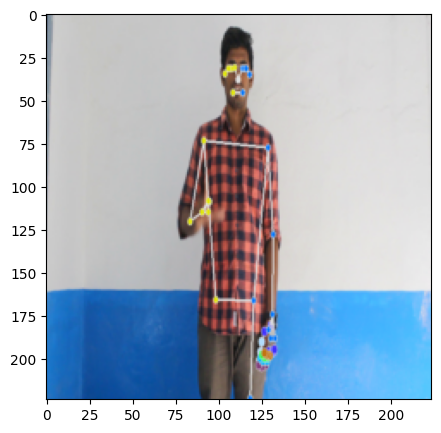

In [ ]:
plt.imshow(inputs['pixel_values'][0,12].permute(1, 2, 0))

In [ ]:
val_ds = dataset_obj.create_dataset(val_path, val_label, training=False)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
del val_ds
torch.cuda.empty_cache()
gc.collect()

In [ ]:
# Example usage
inputs = next(iter(val_dl))
print(inputs['pixel_values'].shape, inputs['labels'].shape)

torch.Size([8, 32, 3, 224, 224]) torch.Size([8])


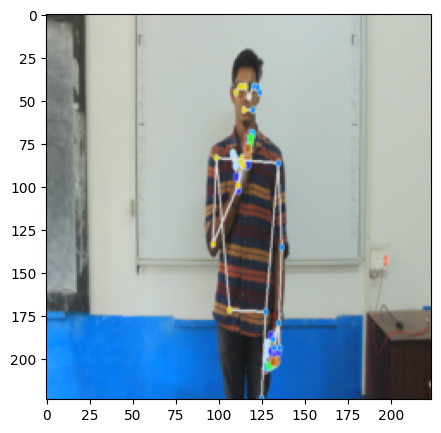

In [ ]:
plt.imshow(inputs['pixel_values'][0,7].permute(1, 2, 0))